<a href="https://colab.research.google.com/github/hwankang/CNN_Onedimensional/blob/master/one_CNN_0906_07_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hwankang/CNN_Onedimensional

Cloning into 'CNN_Onedimensional'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [10]:
%cd CNN_Onedimensional

/content/CNN_Onedimensional


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection
import pandas as pd
import torch

In [12]:
#data = pd.read_csv('data.csv')
data = pd.read_csv('./data.csv')

In [20]:
data.info()
data.head()
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,0


In [13]:
x = data.drop(columns = ['Unnamed: 0','y'])
y = data['y']

x = x.to_numpy()
y = y.to_numpy()
y[y!=1] = 0

print('Instancias:', np.shape(x)[0])
print('Dimensiones:', np.shape(x)[1])
print('Instancias/Dimensiones:', int(np.shape(x)[0]/np.shape(x)[1]))
print('Clases:', np.unique(y, return_counts=True)[0], 'Instancias por clase:', np.unique(y, return_counts=True)[1])

Instancias: 11500
Dimensiones: 178
Instancias/Dimensiones: 64
Clases: [0 1] Instancias por clase: [9200 2300]


In [14]:
scaler = sklearn.preprocessing.StandardScaler()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.7)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1, 5, kernel_size=8, stride=1, padding=1, padding_mode='zeros'),
    torch.nn.MaxPool1d(kernel_size=3),
    torch.nn.Conv1d(5, 1, kernel_size=2, stride=1, padding=1, padding_mode='zeros'),
    torch.nn.Linear(58, 2)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) #lr: learning rate
epochs = 120
loss_arr = np.zeros(epochs)
f1_train = np.zeros(epochs)
f1_test = np.zeros(epochs)

for epoch in range(epochs):
    x_new = np.expand_dims(x_train, 1) 
    inputs = torch.autograd.Variable(torch.Tensor(x_new).float())
    targets = torch.autograd.Variable(torch.Tensor(y_train).long())
    
    optimizer.zero_grad()
    out = model(inputs)
    out = out.squeeze(dim=1)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, y_predicted = torch.max(out.data, 1)
    loss_arr[epoch] = loss.item()
    f1_train[epoch] = sklearn.metrics.f1_score(y_train, y_predicted, average='macro')
    
    x_new = np.expand_dims(x_test, 1)
    inputs_test = torch.autograd.Variable(torch.Tensor(x_new).float())
    out_test = model(inputs_test)
    out_test = out_test.squeeze(dim=1)
    values, y_predt = torch.max(out_test.data, 1)
    f1_test[epoch] = sklearn.metrics.f1_score(y_test, y_predt, average='macro')

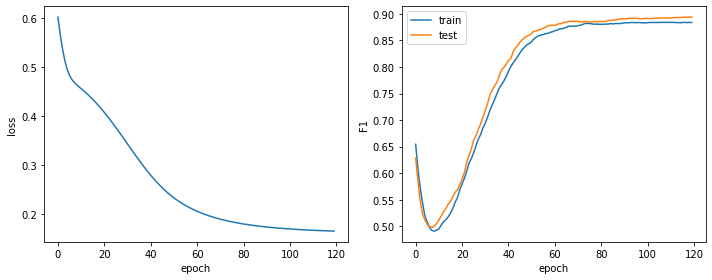

In [18]:
plt.figure(figsize = (10,4))

plt.subplot(121)
plt.plot(np.arange(epochs), loss_arr)
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(122)
plt.plot(np.arange(epochs), f1_train, label='train')
plt.plot(np.arange(epochs), f1_test, label='test')
plt.xlabel('epoch')
plt.ylabel('F1')
plt.legend()

plt.tight_layout()

In [19]:
print('F1 Score Max:', max(np.max(f1_test),np.max(f1_train)))

F1 Score Max: 0.8939622061760639


# 새 섹션

# 새 섹션